In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_style('darkgrid')
ROOT = os.getcwd()
print(ROOT)

/home/genrev_kiel_hizon/SAR_flood_segmentation/src


In [20]:
PATH = os.path.join(ROOT, 'wandb_results.csv')
df = pd.read_csv(PATH)
df.loc[df['backbone'] == 'timm-mobilenetv3_small_minimal_100', 'backbone'] = 'mobilenet'
df.sample()

,Name,model,backbone,target,trainable_params,test_miou,holdout_miou,batch_size
38,genial-dew-46,u-net,resnet34,Water,24436369,67.740204,17.189894,64


In [30]:
df.loc[df['backbone']=='mobilenet', ['model', 'trainable_params']].groupby('model').mean()

,trainable_params
model,
linknet,856491.0
u-net,3087529.0


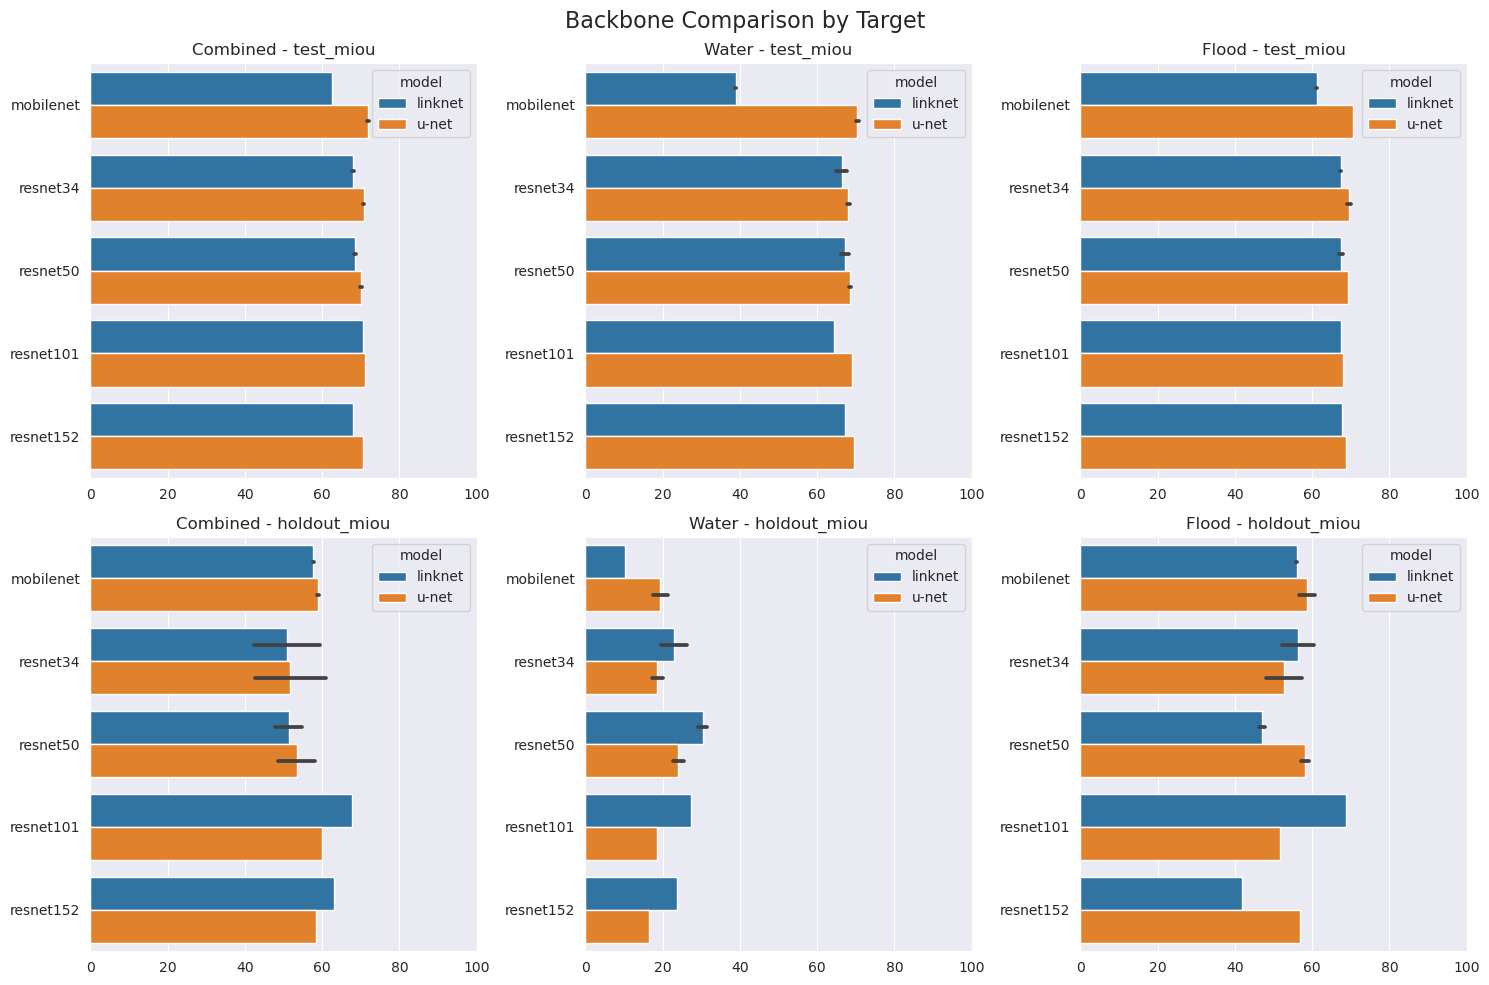

In [26]:
# Get unique targets and sort df by trainable_params
targets = df['target'].unique()
df_sorted = df.sort_values('trainable_params')

# Set up the plot
fig, axes = plt.subplots(2, len(targets), figsize=(5*len(targets), 10))
fig.suptitle('Backbone Comparison by Target', fontsize=16)

# Flatten axes array if there's only one target
if len(targets) == 1:
    axes = axes.reshape(-1, 1)

for col, target in enumerate(targets):
    target_df = df_sorted[df_sorted['target'] == target]
    
    for row, metric in enumerate(['test_miou', 'holdout_miou']):
        ax = axes[row, col]
        
        # Create horizontal bar plot
        sns.barplot(x=metric, y='backbone', hue='model', data=target_df, ax=ax, orient='h')
        
        # Set title and remove labels
        ax.set_title(f'{target} - {metric}')
        ax.set(xlabel='', ylabel='')
        
        # Set x-axis limits
        ax.set_xlim(0, 100)

# Adjust layout and display plot
plt.tight_layout()
plt.savefig('results.png')
plt.show()